# Part 2
## Question 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence

In [3]:
def sim_BS(T, r, S0, sigma_stock, M, seed=None):
    # Function to simulate a stock price using the Black-Scholes model

    rs = RandomState(MT19937(SeedSequence(seed)))

    dt = T / M
    S = np.zeros(M + 1)
    S[0] = S0
    for i in range(1, M + 1):
        Z = rs.standard_normal()
        S[i] = S[i - 1] * np.exp((r - 0.5 * sigma_stock ** 2) * dt + sigma_stock * np.sqrt(dt) * Z)
    return S

Option value:  0.0


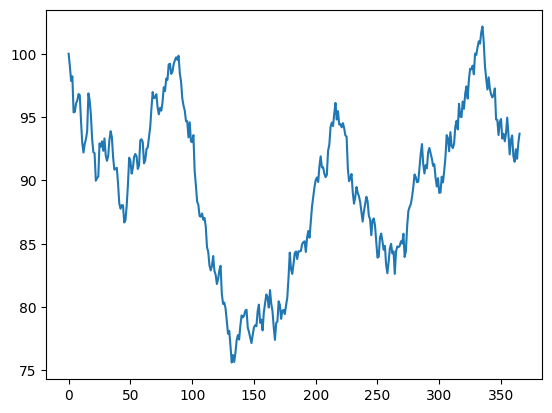

In [5]:
# Setting the parameter values
T = 1               # The time to maturity = 1 year
K = 99              # Strike price = 99 euros
r = 0.06            # Risk-free interest rate = 6%
S0 = 100            # The current stock price = 100 euros
sigma_stock = 0.2   # Volatility in the stock price = 20%
M = 365             # Number of time steps (calculate the new stock price every day of the year)

S = sim_BS(T, r, S0, sigma_stock, M, None)
plt.plot(S)
print("Option value: ", np.maximum(S[-1] - K, 0))

Simulating deltas with the same seed: 100%|██████████| 10000/10000 [00:16<00:00, 590.82it/s]


Mean delta and standard deviation with different seeds: 0.21552657357086902, 230.54420608941882
Mean delta and standard deviation with the same seed: 0.7157656505840473, 0.5995228211416442


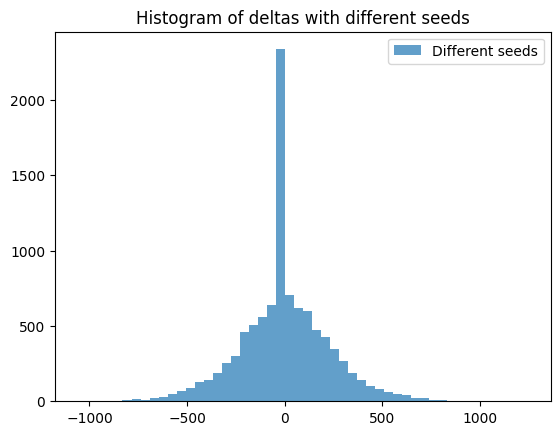

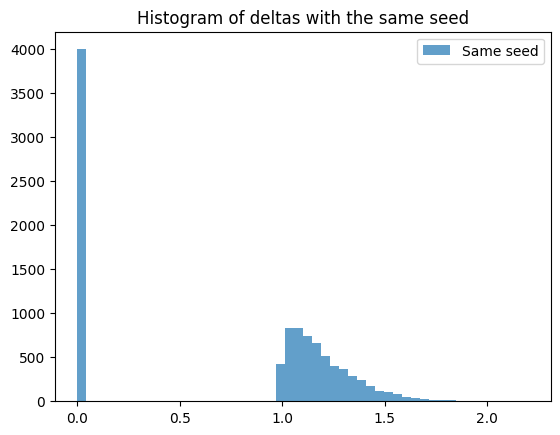

In [6]:
# Monte Carlo Simulation bump and revalue

# Setting the parameter values
T = 1               # The time to maturity = 1 year
K = 99              # Strike price = 99 euros
r = 0.06            # Risk-free interest rate = 6%
S0 = 100            # The current stock price = 100 euros
sigma_stock = 0.2   # Volatility in the stock price = 20%
M = 365             # Number of time steps (calculate the new stock price every day of the year)


N = 10000           # Number of repetitions
bump = 0.1          # The size of the bump

delta_diff = np.zeros(N) # Array for results with different seeds
delta_same = np.zeros(N) # Array for results with the same seed

# Different seeds (setting None gives different seeds every time):
for i in tqdm(range(N), desc='Simulating deltas with different seeds'):
    unbumped_S = sim_BS(T, r, S0, sigma_stock, M, seed=None)
    unbumped_payoff = np.maximum(unbumped_S[-1] - K, 0)

    bumped_S = sim_BS(T, r, S0 + bump, sigma_stock, M, seed=None)
    bumped_payoff = np.maximum(bumped_S[-1] - K, 0)

    delta_diff[i] = (bumped_payoff - unbumped_payoff) / bump

# Same seeds (setting a specific seed gives the same seed every time):
for i in tqdm(range(N), desc='Simulating deltas with the same seed'):
    seed = np.random.randint(0, 1000000)

    unbumped_S = sim_BS(T, r, S0, sigma_stock, M, seed=seed)
    unbumped_payoff = np.maximum(unbumped_S[-1] - K, 0)

    bumped_S = sim_BS(T, r, S0 + bump, sigma_stock, M, seed=seed)
    bumped_payoff = np.maximum(bumped_S[-1] - K, 0)

    # print(f"Bumped payoff: {bumped_payoff}, Unbumped payoff: {unbumped_payoff}, Delta: {(bumped_payoff - unbumped_payoff) / bump}")
    delta_same[i] = (bumped_payoff - unbumped_payoff) / bump

    # if 0 < delta_same[i] < 1:
    #     print(f"Seed {i} gives a delta of {delta_same[i]}")

print(f"Mean delta and standard deviation with different seeds: {np.mean(delta_diff)}, {np.std(delta_diff)}")
print(f"Mean delta and standard deviation with the same seed: {np.mean(delta_same)}, {np.std(delta_same)}")

# Plotting the results in different histograms
plt.figure()
plt.hist(delta_diff, bins=50, alpha=0.7, label='Different seeds')
plt.legend()
plt.title('Histogram of deltas with different seeds')
plt.show()

plt.figure()
plt.hist(delta_same, bins=50, alpha=0.7, label='Same seed')
plt.legend()
plt.title('Histogram of deltas with the same seed')
plt.show()


## Question 2

Simulating deltas with the same seed: 100%|██████████| 10000/10000 [00:16<00:00, 598.92it/s]


Mean delta and standard deviation with different seeds: 0.10736115682860436, 6.588785788267551
Mean delta and standard deviation with the same seed: 0.02166058427243772, 0.4511347022053645


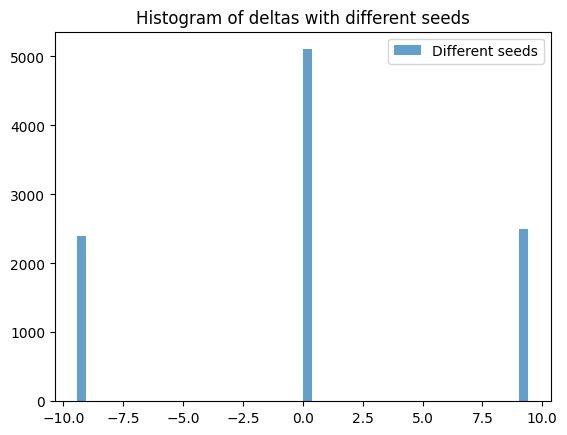

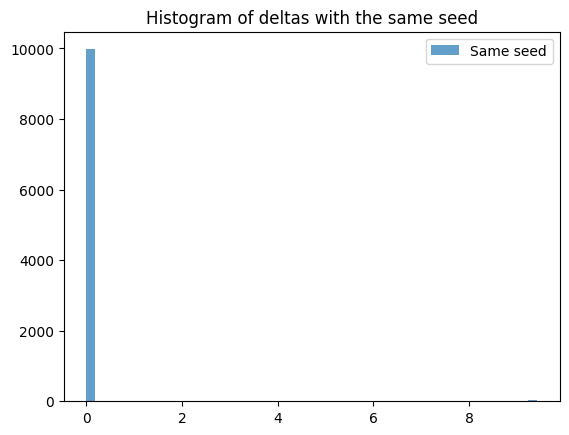

Number of values that are not 0 for the same seed: 23
Values: [9.41764534 9.41764534 9.41764534 9.41764534 9.41764534 9.41764534
 9.41764534 9.41764534 9.41764534 9.41764534 9.41764534 9.41764534
 9.41764534 9.41764534 9.41764534 9.41764534 9.41764534 9.41764534
 9.41764534 9.41764534 9.41764534 9.41764534 9.41764534]


In [7]:
# Monte Carlo Simulation bump and revalue digital option

# Setting the parameter values
T = 1               # The time to maturity = 1 year
K = 99              # Strike price = 99 euros
r = 0.06            # Risk-free interest rate = 6%
S0 = 100            # The current stock price = 100 euros
sigma_stock = 0.2   # Volatility in the stock price = 20%
M = 365             # Number of time steps (calculate the new stock price every day of the year)


N = 10000            # Number of repetitions
bump = 0.1            # The size of the bump

delta_diff = np.zeros(N) # Array for results with different seeds
delta_same = np.zeros(N) # Array for results with the same seed

# Different seeds (setting None gives different seeds every time):
for i in tqdm(range(N), desc='Simulating deltas with different seeds'):
    unbumped_S = sim_BS(T, r, S0, sigma_stock, M, seed=None)
    unbumped_payoff = 1 if unbumped_S[-1] > K else 0 # NEW PAYOFF LINE

    bumped_S = sim_BS(T, r, S0 + bump, sigma_stock, M, seed=None)
    bumped_payoff = 1 if bumped_S[-1] > K else 0

    delta_diff[i] = np.exp(-r * T) * (bumped_payoff - unbumped_payoff) / bump

# Same seeds (setting a specific seed gives the same seed every time):
for i in tqdm(range(N), desc='Simulating deltas with the same seed'):
    seed = np.random.randint(0, 1000000)

    unbumped_S = sim_BS(T, r, S0, sigma_stock, M, seed=seed)
    unbumped_payoff = 1 if unbumped_S[-1] > K else 0

    bumped_S = sim_BS(T, r, S0 + bump, sigma_stock, M, seed=seed)
    bumped_payoff = 1 if bumped_S[-1] > K else 0

    # print(f"Bumped payoff: {bumped_payoff}, Unbumped payoff: {unbumped_payoff}, Delta: {(bumped_payoff - unbumped_payoff) / bump}")
    delta_same[i] = np.exp(-r * T) * (bumped_payoff - unbumped_payoff) / bump

print(f"Mean delta and standard deviation with different seeds: {np.mean(delta_diff)}, {np.std(delta_diff)}")
print(f"Mean delta and standard deviation with the same seed: {np.mean(delta_same)}, {np.std(delta_same)}")

# Plotting the results in different histograms
plt.figure()
plt.hist(delta_diff, bins=50, alpha=0.7, label='Different seeds')
plt.legend()
plt.title('Histogram of deltas with different seeds')
plt.show()

plt.figure()
plt.hist(delta_same, bins=50, alpha=0.7, label='Same seed')
plt.legend()
plt.title('Histogram of deltas with the same seed')
plt.show()

print(f"Number of values that are not 0 for the same seed: {np.sum(delta_same != 0)}")
print(f"Values: {delta_same[delta_same != 0]}")

In this situation, a bigger bump could improve the results. Since the numerator for the estimate is $\in \{-1, 0, 1\}$, a small bump blows up this estimate.

In [8]:
def smooth_digital_payoff(S, K, epsilon):
    return 1 / (1 + np.exp(- (S - K) / epsilon))

Simulating deltas with pathwise method:   0%|          | 0/10000 [00:00<?, ?it/s]C:\Users\Admin\AppData\Local\Temp\ipykernel_18800\3659772532.py:29: RuntimeWarning: overflow encountered in scalar power
  delta[i] = np.exp(-r * T) * ST_term / (epsilon * (ST_term + 1)**2) * S[-1] / S0
Simulating deltas with pathwise method: 100%|██████████| 10000/10000 [00:08<00:00, 1132.60it/s]


Mean delta and standard deviation with pathwise method: 0.02012888683352138, 0.14367531180458723


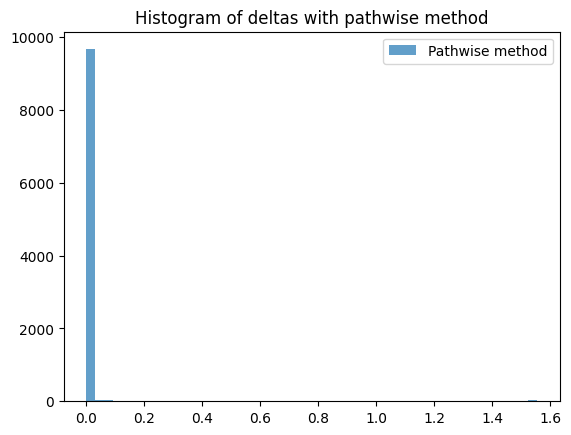

Number of values that are not 0 for the pathwise method: 9680
Values: [4.98507505e-23 1.52398729e-21 1.38970012e-07 ... 3.04678913e-44
 3.28888650e-44 4.13987273e-16]


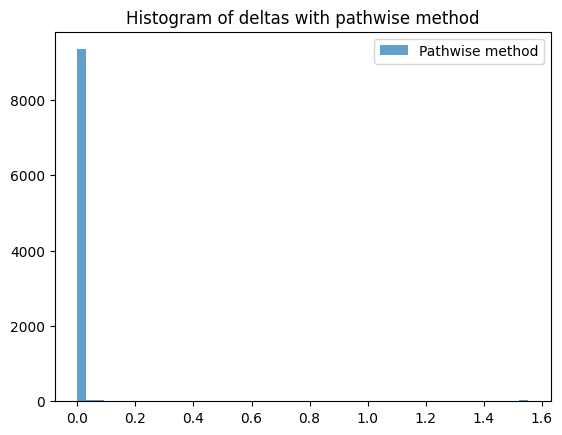

In [9]:
# Pathwise method

# Setting the parameter values
T = 1               # The time to maturity = 1 year
K = 99              # Strike price = 99 euros
r = 0.06            # Risk-free interest rate = 6%
S0 = 100            # The current stock price = 100 euros
sigma_stock = 0.2   # Volatility in the stock price = 20%
M = 365             # Number of time steps (calculate the new stock price every day of the year)

epsilon = 0.15      # Smoothing function parameter

N = 10000            # Number of repetitions

delta = np.zeros(N)  # Array for results

for i in tqdm(range(N), desc='Simulating deltas with pathwise method'):
    S = sim_BS(T, r, S0, sigma_stock, M, seed=None)

    ST_term = np.exp((S[-1] - K) / epsilon)

    # Check if ST_term is too large or too small
    if abs(ST_term) > 1e308 or abs(ST_term) < 1e-308:
        print(f"ST_term is {ST_term} with S[-1] = {S[-1]} and K = {K} and epsilon = {epsilon}")
        continue
    

    # print(ST_term)
    delta[i] = np.exp(-r * T) * ST_term / (epsilon * (ST_term + 1)**2) * S[-1] / S0

print(f"Mean delta and standard deviation with pathwise method: {np.mean(delta)}, {np.std(delta)}")

# Plotting the results in a histogram
plt.figure()
plt.hist(delta, bins=50, alpha=0.7, label='Pathwise method')
plt.legend()
plt.title('Histogram of deltas with pathwise method')
plt.show()

print(f"Number of values that are not 0 for the pathwise method: {np.sum(delta != 0)}")
print(f"Values: {delta[delta != 0]}")

Simulating deltas with likelihood ratio method: 100%|██████████| 10000/10000 [00:08<00:00, 1170.94it/s]


Mean delta and standard deviation with likelihood ratio method: 0.017918604485076685, 0.02741810305802709


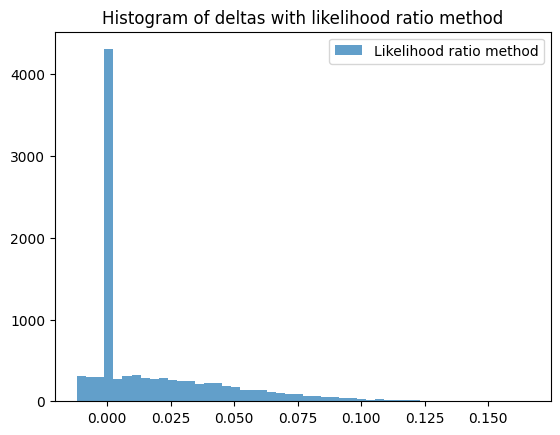

In [10]:
# likelihood ratio method

# Setting the parameter values
T = 1               # The time to maturity = 1 year
K = 99              # Strike price = 99 euros
r = 0.06            # Risk-free interest rate = 6%
S0 = 100            # The current stock price = 100 euros
sigma_stock = 0.2   # Volatility in the stock price = 20%
M = 365             # Number of time steps (calculate the new stock price every day of the year)

N = 10000            # Number of repetitions

delta = np.zeros(N)  # Array for results

for i in tqdm(range(N), desc='Simulating deltas with likelihood ratio method'):
    S = sim_BS(T, r, S0, sigma_stock, M, seed=None)

    Y = (np.log(S[-1] / S0) - (r - 0.5 * sigma_stock**2) * T) / (S0 * sigma_stock ** 2 * T)

    delta[i] = np.exp(-r * T) * (1 if S[-1] > K else 0) * Y

print(f"Mean delta and standard deviation with likelihood ratio method: {np.mean(delta)}, {np.std(delta)}")

# Plotting the results in a histogram
plt.figure()
plt.hist(delta, bins=50, alpha=0.7, label='Likelihood ratio method')
plt.legend()
plt.title('Histogram of deltas with likelihood ratio method')
plt.show()